# Implement 10.16 and 15.4
### Author: Cera Drake
##### [Project Repo](https://github.com/ceradrake/datafun-07-ml-predictive)

### Part 1: Linear Regression

##### Section 1: Load

In [45]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

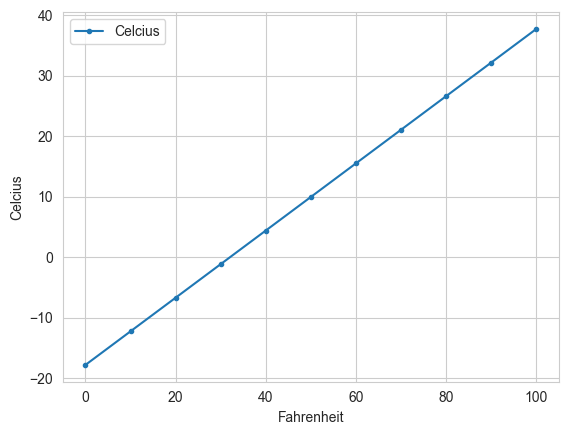

In [46]:
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celcius'])
axes = temps_df.plot(x='Fahrenheit', y='Celcius', style='.-')
y_label = axes.set_ylabel('Celcius')

In [47]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

##### Section 2 - View
###### Load the head and the tail of the file

In [48]:
nyc.head(), nyc.tail()

(     Date  Value  Anomaly
 0  189501   34.2     -3.2
 1  189601   34.7     -2.7
 2  189701   35.5     -1.9
 3  189801   39.6      2.2
 4  189901   36.4     -1.0,
        Date  Value  Anomaly
 119  201401   35.5     -1.9
 120  201501   36.1     -1.3
 121  201601   40.8      3.4
 122  201701   42.8      5.4
 123  201801   38.7      1.3)

##### Section 3 - Clean

In [49]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [50]:
nyc.Date.dtype

dtype('int64')

In [51]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


##### Section 4 - Describe

In [52]:
nyc.Temperature.describe()

count    124.000000
mean      37.595161
std        4.539848
min       26.100000
25%       34.575000
50%       37.600000
75%       40.600000
max       47.600000
Name: Temperature, dtype: float64

##### Section 5  - Calculate the best fit line 

In [53]:
from scipy import stats
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [54]:
linear_regression.slope

0.014771361132966163

In [55]:
linear_regression.intercept

8.694993233674289

##### Section 6 - Predict the temp in 2026

In [56]:
linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

##### Section 7 - Plot

(10.0, 70.0)

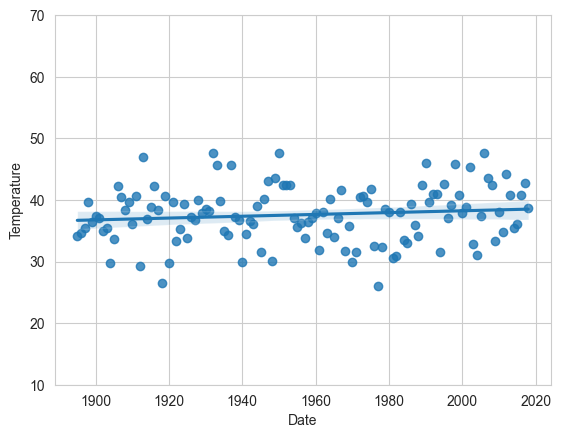

In [57]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)